In [13]:
import datetime
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
data_directory = pathlib.Path('data')
data_directory.exists()

True

In [3]:
data_files = list(data_directory.glob('*.csv'))

 - starting data\2001_data.csv
 - starting data\2002_data.csv
 - starting data\2003_data.csv
 - starting data\2004_data.csv
 - starting data\2005_data.csv
 - starting data\2006_data.csv
 - starting data\2007_data.csv
 - starting data\2008_data.csv
 - starting data\2009_data.csv
 - starting data\2010_data.csv
 - starting data\2011_data.csv
 - starting data\2012_data.csv
 - starting data\2013_data.csv
 - starting data\2014_data.csv
 - starting data\2015_data.csv
 - starting data\2016_data.csv
 - starting data\2017_data.csv
 - starting data\2018_data.csv
 - starting data\2019_data.csv
 - starting data\2020_data.csv
 - starting data\2021_data.csv
 - starting data\2022_data.csv


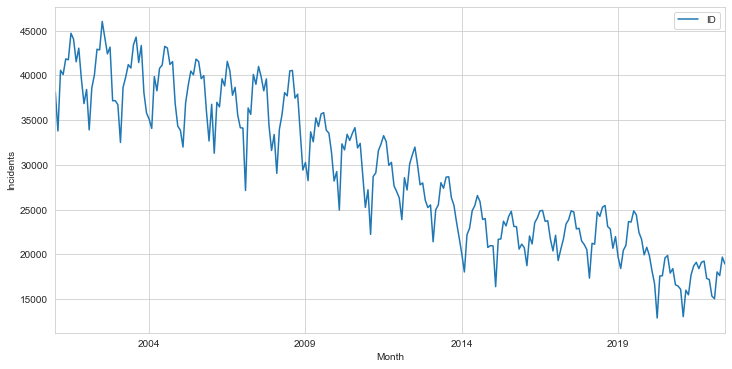

CPU times: total: 1min 34s
Wall time: 1min 35s


In [18]:
%%time
update_time = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')

all_data = pd.DataFrame()
for cfile in data_files:
    print(f' - starting {cfile}')
    cdata = pd.read_csv(cfile)
    cdata['Date'] = pd.to_datetime(cdata['Date'], format="%m/%d/%Y %I:%M:%S %p")
    cdata['Month'] = cdata.Date.dt.to_period('M')
    cdata['Month'] = cdata.Month.dt.start_time
    monthly_incidents = cdata.groupby('Month')['ID'].nunique().reset_index()
    all_data = pd.concat([all_data, monthly_incidents])
    
fig, ax = plt.subplots(1, 1, figsize = (12, 6))

all_data.plot(
    x = 'Month',
    y = 'ID',
    ax = ax,
    ylabel = 'Incidents'
)

plt.savefig(f'incident_timeseries_{update_time}.pdf', bbox_inches = 'tight')
plt.show()